# Tarea Semana 1




- Recuperar el dataset
- Analizar y preparar el dataset 
- Separar el dataset en dos, train y test (80% - 20%)
- Ejecutar el modelo supervisado linear regression, la variable a predecir es Global_Sales 
- Calcular el error del modelo

In [1]:
import pandas as pd
import numpy as  np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Recuperar DataSet

In [2]:
df = pd.read_csv("vgsales v3.csv", sep=';')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Analizar y preparar DataSet

In [3]:
#Ver tipos de datos
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
# Ver valores nulos

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          5
JP_Sales          4
Other_Sales       4
Global_Sales      6
dtype: int64

## Manejar valores nulos

Dado que existen valores nulos correspondientes a las ventas de cada lugar debemos solucionarlo para que no afecten el resultado final.
La suma de las ventas de cada lugar, resultan en Global Sales.

### Global Sales

Se realiza la suma de los valores de las columnas NA_Sales, EU_Sales, JP_Sales, y Other Sales

In [5]:
#Filas donde existen valores nulos

df[df['Global_Sales'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
230,231,Guitar Hero III: Legends of Rock,Wii,2007.0,Misc,Activision,3.06,1.12,0.00,0.44,NaN
231,232,The Legend of Zelda: A Link to the Past,SNES,1991.0,Action,Nintendo,2.42,0.91,1.15,0.13,NaN
232,233,The Legend of Zelda: The Wind Waker,GC,2002.0,Action,Nintendo,2.60,0.99,0.89,0.13,NaN
233,234,Mario & Sonic at the Olympic Winter Games,Wii,2009.0,Sports,Sega,1.89,1.99,0.22,0.48,NaN
234,235,Luigi's Mansion: Dark Moon,3DS,2013.0,Action,Nintendo,1.78,1.39,1.10,0.30,NaN
339,340,Tony Hawk's Pro Skater 4,PS2,2002.0,Sports,Activision,2.13,1.18,0.01,0.35,NaN


In [6]:
randGlobal_Sales = df["EU_Sales"] + df["NA_Sales"] + df["JP_Sales"] + df["Other_Sales"]

In [7]:
df.Global_Sales = df.Global_Sales.fillna(randGlobal_Sales)

In [8]:
df[df['Global_Sales'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


### EU_Sales

Se realiza la suma de NA_Sales, JP_Sales y Other_Sales, y luego se le resta a Global_Sales, con el fin de obtener EU_Sales

In [9]:
#Filas donde existen valores nulos

df[df['EU_Sales'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
76,77,Super Mario Kart,SNES,1992.0,Racing,Nintendo,3.54,NaN,3.81,0.18,8.76
131,132,Kingdom Hearts,PS2,2002.0,Role-Playing,Sony Computer Entertainment,3.64,NaN,1.49,0.07,6.40
132,133,Pokémon Crystal Version,GB,2000.0,Role-Playing,Nintendo,2.55,NaN,1.29,0.99,6.39
133,134,Halo 3: ODST,X360,2009.0,Shooter,Microsoft Game Studios,4.34,NaN,0.06,0.61,6.36
317,318,Namco Museum Vol.1,PS,1995.0,Misc,Sony Computer Entertainment,2.12,NaN,0.22,0.06,3.84


In [10]:
df.loc[np.isnan(df["EU_Sales"]), "EU_Sales"] = (df["Global_Sales"]-df["Other_Sales"]-df["JP_Sales"]-df["NA_Sales"])

In [11]:
df[df['EU_Sales'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


### JP_Sales 

Se realiza la suma de NA_Sales, EU_Sales y Other_Sales, y luego se le resta a Global_Sales, con el fin de obtener JP_Sales

In [12]:
#Filas donde existen valores nulos

df[df['JP_Sales'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
53,54,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,2.99,NaN,0.78,10.79
54,55,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.88,NaN,2.12,10.77
55,56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.69,NaN,1.63,10.69
319,320,Mario & Luigi: Bowser's Inside Story,DS,2009.0,Role-Playing,Nintendo,2.26,0.48,NaN,0.27,3.83


In [13]:
df.loc[np.isnan(df["JP_Sales"]), "JP_Sales"] = (df["Global_Sales"]-df["Other_Sales"]-df["EU_Sales"]-df["NA_Sales"])

In [14]:
df[df['JP_Sales'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


### Other Sales

Se realiza la suma de NA_Sales, JP_Sales y EU_Sales, y luego se le resta a Global_Sales, con el fin de obtener Other_Sales

In [15]:
#Filas donde existen valores nulos

df[df['Other_Sales'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
338,339,Friend Collection,DS,2009.0,Misc,Nintendo,0.00,0.00,3.67,NaN,3.67
357,358,Star Wars: Battlefront II,PS2,2005.0,Shooter,LucasArts,2.18,1.02,0.03,NaN,3.59
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,NaN,3.49
378,379,Star Wars Battlefront (2015),XOne,2015.0,Shooter,Electronic Arts,1.94,1.22,0.02,NaN,3.49


In [16]:
df.loc[np.isnan(df["Other_Sales"]), "Other_Sales"] = (df["Global_Sales"]-df["JP_Sales"]-df["EU_Sales"]-df["NA_Sales"])

In [17]:
df[df['Other_Sales'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [18]:
# Ver valores nulos

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Coeficiente de correlación

### Na_Sales y Global_Sales

La correlación de Pearson es 0.9410477391296073 con un p-value de  0.0


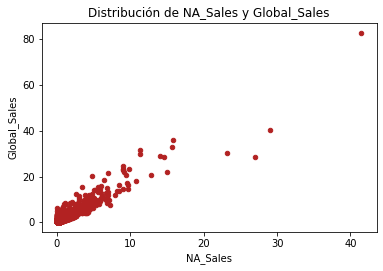

In [19]:
fig, ax = plt.subplots(figsize=(6, 3.84))

df.plot(
    x    = 'NA_Sales',
    y    = 'Global_Sales',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de NA_Sales y Global_Sales');

pearson_coef, p_value = stats.pearsonr(df["NA_Sales"], df["Global_Sales"])
print("La correlación de Pearson es", pearson_coef, "con un p-value de ", p_value)

### EU_Sales y Global_Sales

La correlación de Pearson es 0.9028315138552994 con un p-value de  0.0


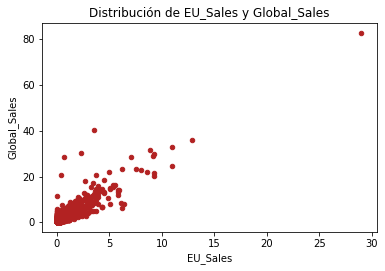

In [20]:
fig, ax = plt.subplots(figsize=(6, 3.84))

df.plot(
    x    = 'EU_Sales',
    y    = 'Global_Sales',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de EU_Sales y Global_Sales');

pearson_coef, p_value = stats.pearsonr(df["EU_Sales"], df["Global_Sales"])
print("La correlación de Pearson es", pearson_coef, "con un p-value de ", p_value)

### JP_Sales y Global_Sales

La correlación de Pearson es 0.6118165343877388 con un p-value de  0.0


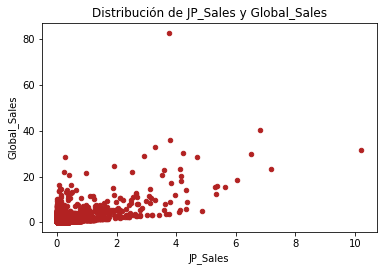

In [21]:
fig, ax = plt.subplots(figsize=(6, 3.84))

df.plot(
    x    = 'JP_Sales',
    y    = 'Global_Sales',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de JP_Sales y Global_Sales');

pearson_coef, p_value = stats.pearsonr(df["JP_Sales"], df["Global_Sales"])
print("La correlación de Pearson es", pearson_coef, "con un p-value de ", p_value)

### Other_Sales y Global_Sales

La correlación de Pearson es 0.748327964548537 con un p-value de  0.0


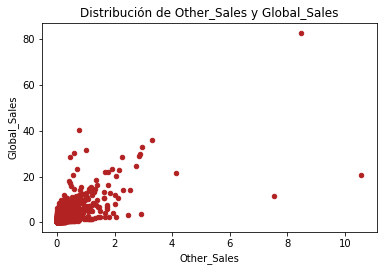

In [22]:
fig, ax = plt.subplots(figsize=(6, 3.84))

df.plot(
    x    = 'Other_Sales',
    y    = 'Global_Sales',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Other_Sales y Global_Sales');

pearson_coef, p_value = stats.pearsonr(df["Other_Sales"], df["Global_Sales"])
print("La correlación de Pearson es", pearson_coef, "con un p-value de ", p_value)

In [23]:
df.corr()["Global_Sales"].sort_values()

Rank           -0.427407
Year           -0.074736
JP_Sales        0.611817
Other_Sales     0.748328
EU_Sales        0.902832
NA_Sales        0.941048
Global_Sales    1.000000
Name: Global_Sales, dtype: float64

# Separar el dataset en dos, train y test (80% - 20%)

In [24]:
train, test = train_test_split(df, test_size = 0.20, random_state = 1)

In [25]:
#Guardar a csv

train.to_csv('train.csv')
test.to_csv('test.csv')

In [26]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  13278
Ejemplos usados para test:  3320


# Regresión Lineal Simple

Predecir ventas globales a partir de ventas en norteamérica, la variable con mejor correlación.

In [27]:

X_train = train["NA_Sales"].values.reshape(-1,1)
y_train= train["Global_Sales"].values.reshape(-1, 1)
X_test = test["NA_Sales"].values.reshape(-1,1)
y_test= test["Global_Sales"].values.reshape(-1, 1)

In [28]:
#Creando el modelo y entrenando

reg = LinearRegression().fit(X_train,y_train)


In [29]:
#Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train)

#Prediciendo valores de validación
y_test_hat = reg.predict(X_test)

## Calcular el error del modelo

### R2

"𝑅2: mide que tan bien una variable independiente describe la varible de respuesta.

- Un valor de 1 indica un ajuste perfecto. 
- Un valor de 0 indica un que el modelo es equivalente a la media. 
- Valores aceptados de R2 en problemas reales rondan desde 0.7 a 0.9"

In [30]:
# Calculamos el  error

print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.8886426897080482
Prueba 0.8707860121438579


### Error cuadrático medio (RMSE)

"Indica el ajuste absoluto del modelo a los datos, cuán cerca están los puntos de datos observados de los valores predichos del modelo. El error cuadratico medio o RMSE es una medida absoluta de ajuste.

Los valores más bajos de RMSE indican un mejor ajuste. RMSE es una buena medida de la precisión con que el modelo predice la respuesta, y es el criterio más importante para ajustar si el propósito principal del modelo es la predicción"

In [31]:
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_test_hat,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.5197379468597262


# Regresión Lineal Múltiple

Utilizaremos las variables con mejor correlación para mejorar los resultados. Estas son NA_Sales y EU_Sales.

In [32]:
X_train = train[["NA_Sales","EU_Sales"]]
y_train= train["Global_Sales"].values.reshape(-1, 1)
X_test = test[["NA_Sales", "EU_Sales"]]
y_test= test["Global_Sales"].values.reshape(-1, 1)

In [33]:
# Se entrena el modelo
reg = LinearRegression().fit(X_train,y_train)

# Hacemos las  predicciones
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)



### R2

In [34]:
# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.9643485719342575
Prueba 0.9666914130057827


### RMSE

In [35]:
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_test_hat,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.2638807843196478
